In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
# check data
diabetes["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
# load data and label
data, label = diabetes["data"], diabetes["target"]

In [6]:
data.shape, label.shape

((442, 10), (442,))

In [8]:
# load data frame
df = pd.DataFrame(data, columns=diabetes["feature_names"])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
# split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

In [11]:
len(data), len(X_train)/len(data), len(X_test)/len(data)

(442, 0.6990950226244343, 0.3009049773755656)

In [ ]:
# Training - Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model.intercept_, model.coef_

(np.float64(151.00821291456543),
 array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
        -901.95966819,  506.76324136,  121.15435079,  288.03526689,
         659.26895081,   41.37670105]))

In [ ]:
# prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [15]:
# Evaluation with MSE
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train, mse_test



(2924.04637907264, 2821.750981001311)

In [16]:
# Training - Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [17]:
ridge_model.intercept_, ridge_model.coef_

(np.float64(151.86746422977902),
 array([  45.05421022,  -71.94739737,  280.71625182,  195.21266175,
          -2.22930269,  -17.54079744, -148.68886188,  120.46723979,
         198.61440137,  106.93469215]))

In [18]:
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)
ridge_mse_train = mean_squared_error(y_train, ridge_train_pred)
ridge_mse_test = mean_squared_error(y_test, ridge_test_pred)
ridge_mse_train, ridge_mse_test

(3514.8610553657177, 3112.9664151980814)

In [19]:
# Training - Lasso Regression
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [20]:
lasso_model.intercept_, lasso_model.coef_

(np.float64(152.16591884353062),
 array([  0.        ,  -0.        , 443.7033885 ,  51.60109433,
          0.        ,   0.        ,  -0.        ,   0.        ,
        201.96647823,   0.        ]))

In [21]:
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)
lasso_mse_train = mean_squared_error(y_train, lasso_train_pred)
lasso_mse_test = mean_squared_error(y_test, lasso_test_pred)
lasso_mse_train, lasso_mse_test

(3958.28188659717, 3444.6708249776334)

In [22]:
# Evaluation
print(f"Multi Regression Test MSE is {mse_test:.4f}")
print(f"Ridge Regression Test MSE is {ridge_mse_test:.4f}")
print(f"LASSO Regression Test MSE is {lasso_mse_test:.4f}")

Multi Regression Test MSE is 2821.7510
Ridge Regression Test MSE is 3112.9664
LASSO Regression Test MSE is 3444.6708


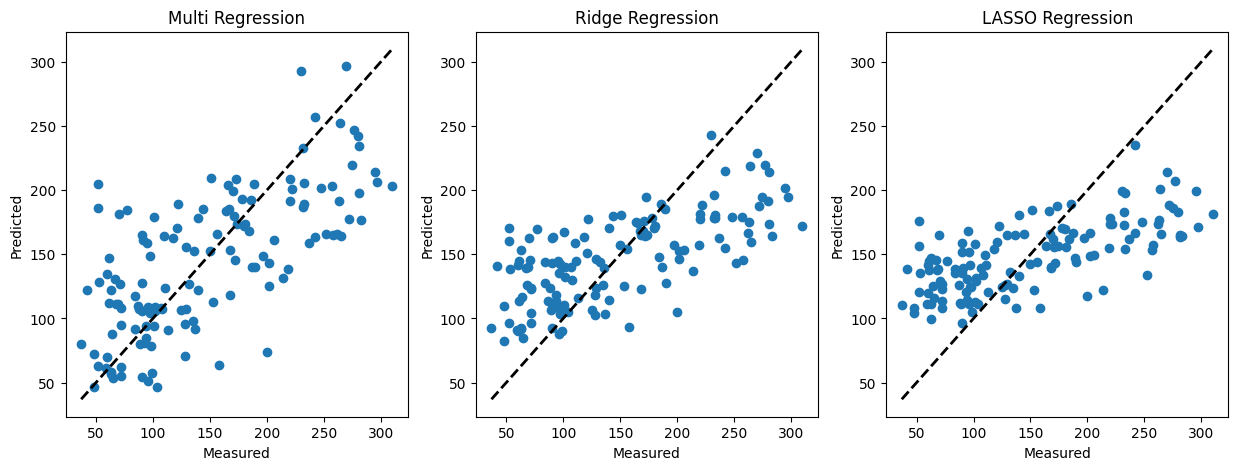

In [24]:
# Plot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
preds = [y_pred_test, ridge_test_pred, lasso_test_pred]
titles = ["Multi Regression", "Ridge Regression", "LASSO Regression"]


for idx, (name, test_pred) in enumerate(zip(titles, preds)):
    ax[idx].scatter(y_test, test_pred)
    ax[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax[idx].set_xlabel('Measured')
    ax[idx].set_ylabel('Predicted')
    ax[idx].set_title(name)